In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load the dataset

In [3]:
data = pd.read_csv('dataset.csv')

# Data Cleaning
# Remove rows with missing price values

In [4]:
data = data.dropna(subset=['price'])

# Convert price to numeric, handling non-numeric values

In [5]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data = data.dropna(subset=['price'])


# Feature Engineering
# Encode categorical variables

In [6]:
le_make = LabelEncoder()
le_model = LabelEncoder()
le_transmission = LabelEncoder()
le_fuel = LabelEncoder()
le_body = LabelEncoder()
le_drivetrain = LabelEncoder()

In [7]:
data['make_encoded'] = le_make.fit_transform(data['make'])
data['model_encoded'] = le_model.fit_transform(data['model'])
data['transmission_encoded'] = le_transmission.fit_transform(data['transmission'])
data['fuel_encoded'] = le_fuel.fit_transform(data['fuel'])
data['body_encoded'] = le_body.fit_transform(data['body'])
data['drivetrain_encoded'] = le_drivetrain.fit_transform(data['drivetrain'])

# Select features for prediction

In [8]:
features = ['year', 'make_encoded', 'model_encoded', 'cylinders', 'mileage', 
            'transmission_encoded', 'fuel_encoded', 'body_encoded', 'drivetrain_encoded']
X = data[features]
y = data['price']


# Handle missing values in numerical columns

In [9]:
X = X.fillna(X.mean())

# Scale the features

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train the model

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)


# Predict and evaluate

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 76149709.80485667
R² Score: 0.7506479715732747


# Feature Importance

In [14]:
feature_importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance

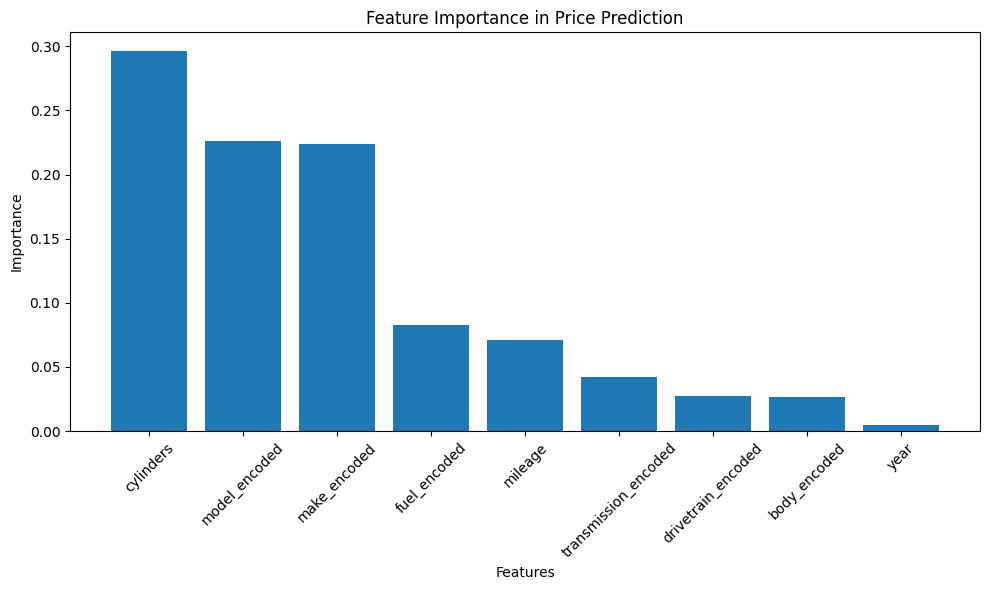

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Price Prediction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example prediction for a new vehicle

In [16]:
new_vehicle = pd.DataFrame({
    'year': [2024],
    'make_encoded': [le_make.transform(['Jeep'])[0]],
    'model_encoded': [le_model.transform(['Wagoneer'])[0]],
    'cylinders': [6],
    'mileage': [10],
    'transmission_encoded': [le_transmission.transform(['8-Speed Automatic'])[0]],
    'fuel_encoded': [le_fuel.transform(['Gasoline'])[0]],
    'body_encoded': [le_body.transform(['SUV'])[0]],
    'drivetrain_encoded': [le_drivetrain.transform(['Four-wheel Drive'])[0]]
})
new_vehicle_scaled = scaler.transform(new_vehicle)
predicted_price = model.predict(new_vehicle_scaled)
print(f'Predicted Price for new vehicle: ${predicted_price[0]:,.2f}')

Predicted Price for new vehicle: $74,567.31


# Save the model and preprocessing objects

In [17]:
joblib.dump(model, 'vehicle_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_make, 'le_make.pkl')
joblib.dump(le_model, 'le_model.pkl')
joblib.dump(le_transmission, 'le_transmission.pkl')
joblib.dump(le_fuel, 'le_fuel.pkl')
joblib.dump(le_body, 'le_body.pkl')
joblib.dump(le_drivetrain, 'le_drivetrain.pkl')

print("Model and preprocessing objects saved successfully.")

Model and preprocessing objects saved successfully.
